# Explaination of This Example

This project allows you to build your own model to classify the ImageNet dataset.

This example demonstrates classification and transfer learning using pre-trained weights.

## Import Libearies

Import the libraries required for this example.

The required libraries must be installed in advance using the `pip install -r requirements.txt` command.

In [1]:
import cv2
import os

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.layers import TFSMLayer

def show_images(images, names):
    plt.subplots_adjust(wspace=4, hspace=4)
    fig, ax = plt.subplots(2, 2)

    for y, plot_y in enumerate(ax):
        for x, plot in enumerate(plot_y):
            plot.axes.get_xaxis().set_visible(False)
            plot.axes.get_yaxis().set_visible(False)
            plot.imshow(images[y * 2 + x])
            plot.set_title(names[y * 2 + x].split(".")[0])

    plt.show()

2025-09-21 22:57:34.100995: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-21 22:57:34.101394: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-09-21 22:57:35.294280: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-09-21 22:57:35.294790: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


## Load Images

Load the images required for the example and output them with matplotlib.

The numbers behind the image represent the class numbers.

<Figure size 640x480 with 0 Axes>

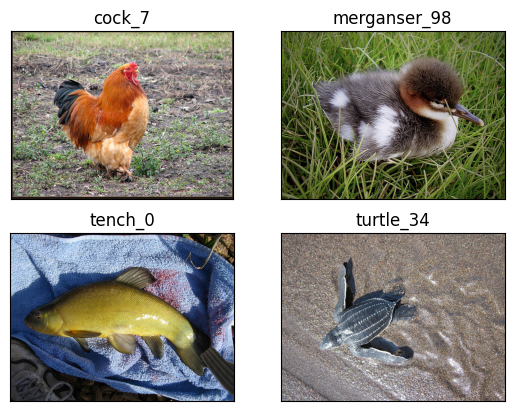

In [2]:
image_label = sorted(os.listdir("images"))
images = [cv2.imread(os.path.join("images", image), cv2.IMREAD_COLOR) for image in image_label]

image_plot = [cv2.cvtColor(image, cv2.COLOR_BGR2RGB) for image in images]

show_images(image_plot, image_label)

## Load Model and Inference

Let's load the model and infer the image above.

The model file can be downloaded from https://github.com/az0422/classify-tf/releases and must be unzipped.

Also, headless weights are used for transfer learning, so they are not used here.

Finally, the input size of the weights is set to 224x224.

E0000 00:00:1758463055.754545 3619363 cuda_executor.cc:1309] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
E0000 00:00:1758463055.768884 3619363 cuda_executor.cc:1309] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1758463055.773607 3619363 gpu_device.cc:2342] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


<Figure size 640x480 with 0 Axes>

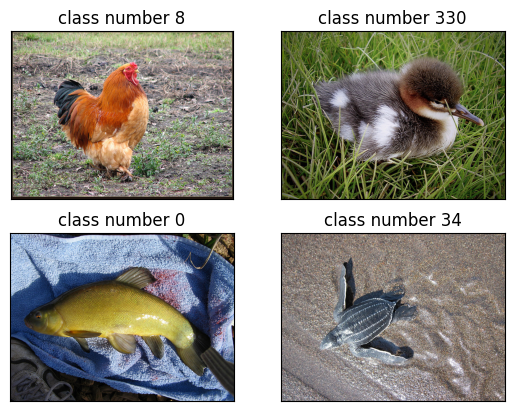

In [ ]:
def resize(image: np.ndarray, target_size: int=224):
    height, width, _ = image.shape

    scale = target_size / max(height, width)
    scaled_width, scaled_height = int(width * scale), int(height * scale)

    image = cv2.resize(image, (scaled_width, scaled_height), interpolation=cv2.INTER_NEAREST)

    pad_width = target_size - scaled_width
    pad_height = target_size - scaled_height

    top, bottom = pad_height // 2, pad_height - pad_height // 2
    left, right = pad_width // 2, pad_width - pad_width // 2

    image = cv2.copyMakeBorder(image, top, bottom, left, right, cv2.BORDER_REPLICATE)

    return image

model_resnet150 = TFSMLayer("path/to/weights")

images_tf = [np.expand_dims(resize(image), axis=0) for image in images]
images_tf = np.concatenate(images_tf, axis=0)
images_tf = tf.convert_to_tensor(images_tf, tf.float32) / 255.
predicts = model_resnet150(images_tf, training=False).numpy()
predicts = np.argmax(predicts, axis=-1)

show_images(image_plot, ["class number %d" % p for p in predicts])

## Load for Transfer Learning

Weight loading for transfer learning can be accomplished by loading headless weights using `tf.keras.layers.TFSMLayer('path/to/weights')` and using them as a backbone.

While this example will not be covered here, I believe it will be applicable to you.